# AIM OF THIS NOTEBOOK: Draw out a comparative analysis of all the oversampling-methods

There are multiple ways to deal with imbalanced data. Some of the ways are:

1. Collection of More Data: A larger dataset might expose a different and perhaps more balanced perspective on the classes for some datasets. In our case, we cannot do that.

2. Checking which Performance Metric works for your dataset: 
    -Accuracy: It doesn't work in the case of imbalanced data.
    -Confusion Matrix: A breakdown of predictions into a table showing correct predictions (the diagonal) and the   types of incorrect predictions made (what classes incorrect predictions were assigned).
    -Precision: A measure of a classifiers exactness.
    -Recall: A measure of a classifiers completeness
    -F1 Score (or F-score): A weighted average of precision and recall.
    -Kappa (or Cohen’s kappa): Classification accuracy normalized by the imbalance of the classes in the data.
    -ROC Curves: Like precision and recall, accuracy is divided into sensitivity and specificity and models can be chosen based on the balance thresholds of these values.
    
3. Resampling Your Dataset: Over-sampling or Under-sampling of data.

4. Generate Synthetic Samples: Randomly sampling the attributes from instances in the minority class.

5. Trying Different Algorithms and Penalized Models: Penalized classification imposes an additional cost on the model for making classification mistakes on the minority class during training.

6. Anomaly detection and Change detection: In our dataset, we have delved into looking  into our fraudulent data.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
import seaborn as sns
from itertools import product
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
import pyLDAvis.gensim

## **Dataset**



In [3]:
import pandas as pd 
df = pd.read_csv('/Users/shivangeeacharya/Downloads/Data_Science_Project/creditcard_train.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,33419.0,-2.178201,-3.132187,1.315758,-0.129783,-2.736013,0.743459,-0.752718,-2.650826,-0.184284,...,-0.828762,-0.219136,-1.004913,0.788588,1.061994,-0.319407,-0.132313,0.333476,937.75,0
1,151317.0,2.064423,0.185575,-1.684612,0.411066,0.479555,-0.797963,0.205544,-0.240568,0.415454,...,-0.351331,-0.876025,0.343288,0.522189,-0.259568,0.173623,-0.056280,-0.029665,1.98,0
2,132434.0,-0.547505,0.798072,-0.719939,-1.129561,0.925708,0.763338,0.231338,0.799204,-0.277812,...,0.366664,1.068933,-0.101523,-1.604148,-0.318277,0.838076,0.012324,-0.015564,11.95,0
3,81787.0,-0.945710,0.323579,0.595681,-1.288095,0.818906,-0.748491,0.890076,-0.130671,-0.471365,...,-0.371528,-1.149510,0.217859,-0.507989,-0.026857,0.591496,-0.326179,-0.007543,24.98,0
4,125062.0,1.898722,-0.321038,-1.771837,0.672408,0.115019,-1.267347,0.612810,-0.441070,0.450298,...,0.015111,0.006269,-0.029094,-0.071333,0.179444,0.378225,-0.106042,-0.059506,104.36,0


<h1>Oversampling the data<h1>

<h2>Synthetic Minority Oversampling<h2>

In [4]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=7)
resampled_X, resampled_Y = sm.fit_resample(df.drop('Class', axis=1), df['Class'])
oversampled_df = pd.concat([pd.DataFrame(resampled_X), pd.DataFrame(resampled_Y)], axis=1)
oversampled_df.columns = df.columns
oversampled_df['Class'].value_counts()

1    199000
0    199000
Name: Class, dtype: int64

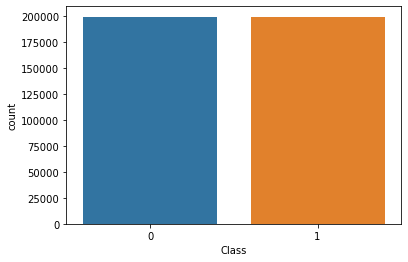

In [7]:
sns.countplot(x='Class', data=oversampled_df)

Hence, we removed the bias from the dataset.

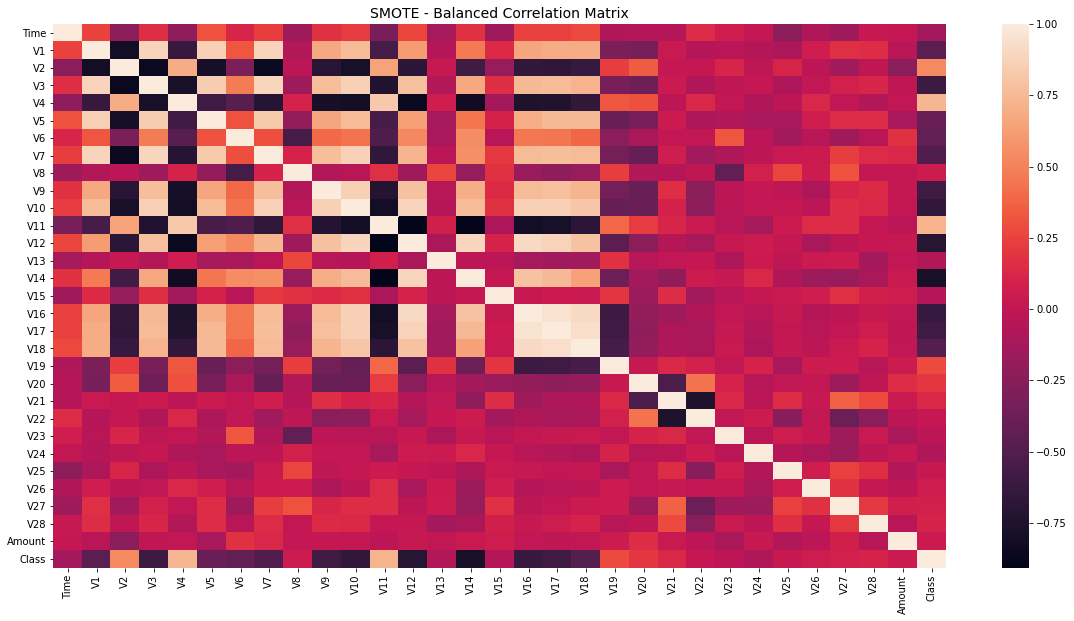

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
corr = oversampled_df.corr()
sns.heatmap(corr, ax=ax)
ax.set_title('SMOTE - Balanced Correlation Matrix', fontsize=14)
plt.show()

Even though the correlations among the features become much more clearer and easier to analyze. However, we observe that the values of each feature varies highly for comparison. Thus, the next step will be to standardize these values as to make them suitable for comparison.

<h2>Random Oversampling Imbalanced Datasets<h2>

In [18]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
resampled_X_ROI, resampled_Y_ROI = oversample.fit_resample(df.drop('Class', axis=1), df['Class'])
oversampled_df_ROI = pd.concat([pd.DataFrame(resampled_X_ROI), pd.DataFrame(resampled_Y_ROI)], axis=1)
oversampled_df_ROI.columns = df.columns
oversampled_df_ROI['Class'].value_counts()

1    199000
0    199000
Name: Class, dtype: int64

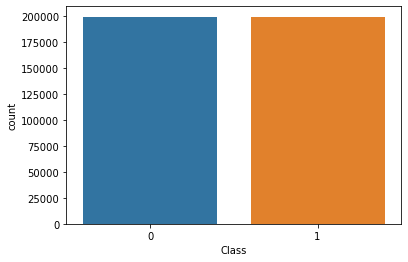

In [20]:
sns.countplot(x='Class', data=oversampled_df_ROI)

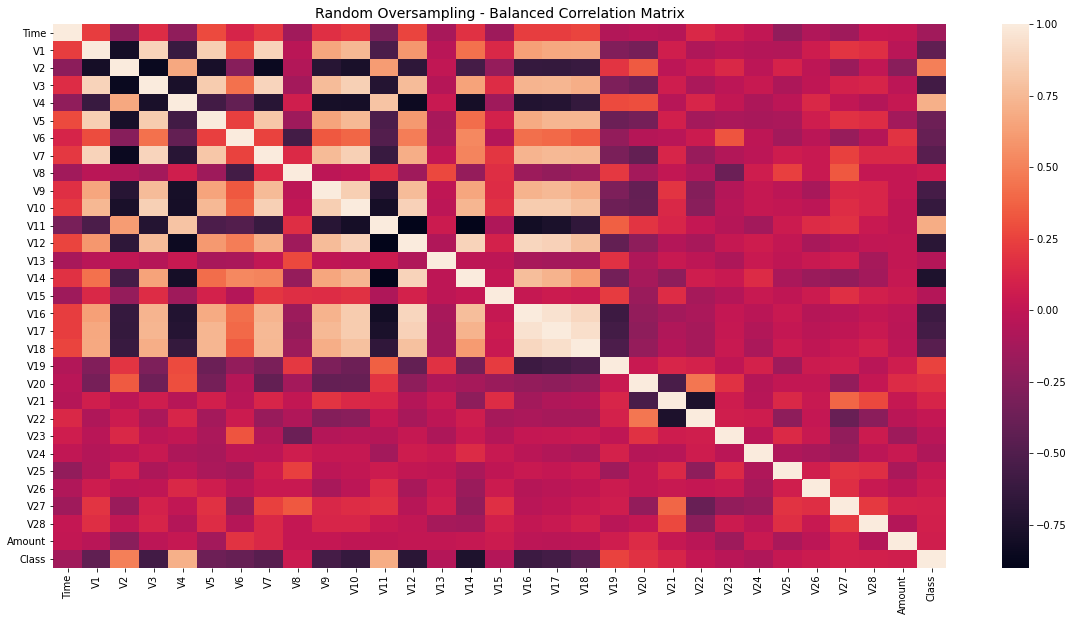

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
corr_ROI = oversampled_df_ROI.corr()
sns.heatmap(corr_ROI, ax=ax)
ax.set_title('Random Oversampling - Balanced Correlation Matrix', fontsize=14)
plt.show()

<h2>Under/Down-sampling<h2>

In this technique, we under sample majority class to match the minority class. It uses a subset of the majority class to train the chosen classifier. Since a lot of majority class examples are ignored, the training set becomes more balanced and the training process becomes faster. The most common preprocessing technique is random majority under-sampling (RUS). In RUS, instances of the majority class are randomly discarded from the dataset.

In [5]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
resampled_X, resampled_Y = rus.fit_resample(df.drop('Class', axis=1), df['Class'])
undersampled_df = pd.concat([pd.DataFrame(resampled_X), pd.DataFrame(resampled_Y)], axis=1)
undersampled_df.columns = df.columns
undersampled_df['Class'].value_counts()

1    364
0    364
Name: Class, dtype: int64

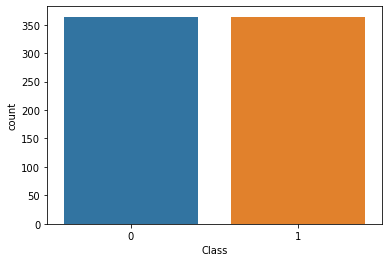

In [8]:
sns.countplot(x='Class', data=undersampled_df)

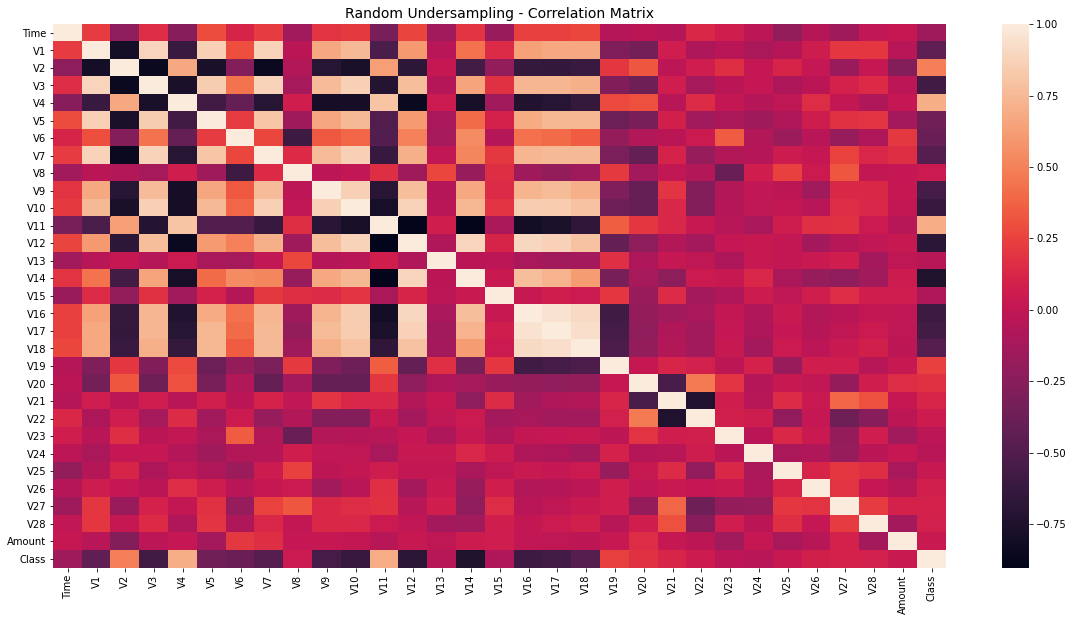

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
corr_ROI = undersampled_df.corr()
sns.heatmap(corr_ROI, ax=ax)
ax.set_title('Random Undersampling - Correlation Matrix', fontsize=14)
plt.show()

<h1>Dimensionality Reduction<h1>

In [10]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

In [ ]:
# New_df is from the random undersample data (fewer instances)
X = df.drop('Class', axis=1)
y = df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))